<a href="https://colab.research.google.com/github/minjoo1412/2020_AI/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

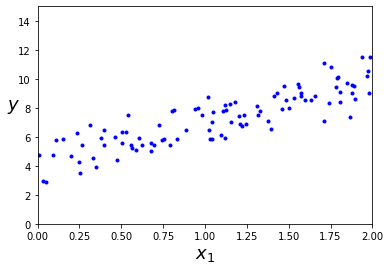

(1) theta_best 출력 확인 =  [[4.17795097]
 [2.87092976]]
(2) y_predict 출력 확인 =  [[4.17795097]
 [9.91981048]]
(3) 화면 출력 확인


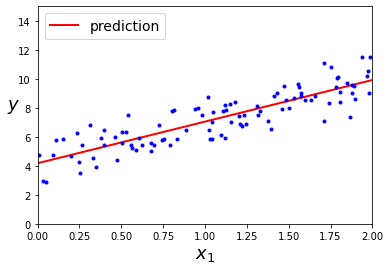

(4) theta_best_svd 출력 확인 =  [[4.17795097]
 [2.87092976]]
(5) np.linalg.pinv(X_b).dot(y) 출력 확인 =  [[4.17795097]
 [2.87092976]]
(6) theta 출력 확인 =  [[4.17795097]
 [2.87092976]]
(7) X_new_b.dot(theta) 출력 확인 =  [[4.17795097]
 [9.91981048]]
(8) 화면 출력 확인


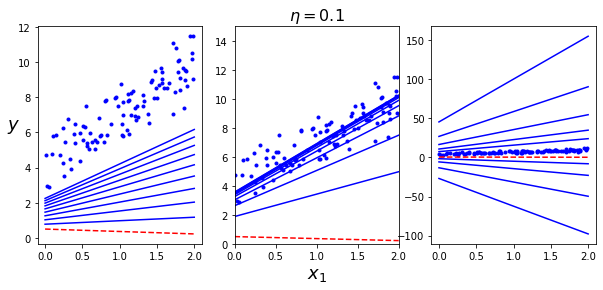

(9) 화면 출력 확인


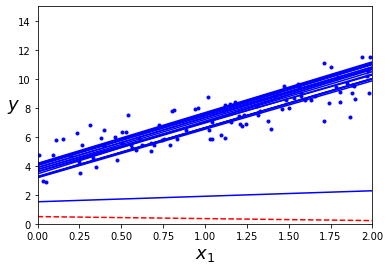

(10) theta 출력 확인
(11) theta 출력 확인


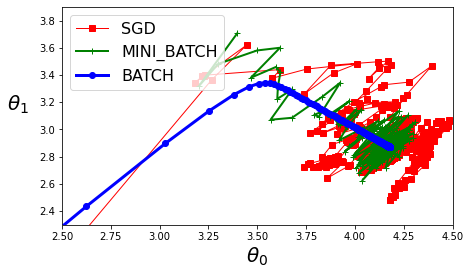

In [25]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
### 정규 방정식을 사용한 선형회귀 접근 ###
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# (1) theta_best 출력 확인
print("(1) theta_best 출력 확인 = ", theta_best)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
# (2) y_predict 출력 확인
print("(2) y_predict 출력 확인 = ", y_predict)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
print("(3) 화면 출력 확인")
plt.show()
# (3) 화면 출력 확인
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("(4) theta_best_svd 출력 확인 = ", theta_best_svd)
# (4) theta_best_svd 출력 확인
# (5) np.linalg.pinv(X_b).dot(y) 출력 확인
print("(5) np.linalg.pinv(X_b).dot(y) 출력 확인 = ", np.linalg.pinv(X_b).dot(y))
### 경사 하강법을 사용한 선형회귀 접근 ###
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients
# (6) theta 출력 확인
print("(6) theta 출력 확인 = ", theta)
# (7) X_new_b.dot(theta) 출력 확인
print("(7) X_new_b.dot(theta) 출력 확인 = ", X_new_b.dot(theta))
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
 m = len(X_b)
 plt.plot(X, y, "b.")
 n_iterations = 1000
 for iteration in range(n_iterations):
  if iteration < 10:
    y_predict = X_new_b.dot(theta)
    style = "b-" if iteration > 0 else "r--"
    plt.plot(X_new, y_predict, style)
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
  if theta_path is not None:
    theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
np.random.seed(42)
theta = np.random.randn(2,1) 
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
print("(8) 화면 출력 확인")
plt.show()
# (8) 화면 출력 확인
### 스토캐스틱 경사 하강법을 사용한 선형회귀 접근 ###
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
 for i in range(m):
  if epoch == 0 and i < 20:
    y_predict = X_new_b.dot(theta)
    style = "b-" if i > 0 else "r--"
    plt.plot(X_new, y_predict, style)
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(epoch * m + i)
  theta = theta - eta * gradients
  theta_path_sgd.append(theta)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
print("(9) 화면 출력 확인")
plt.show()
# (9) 화면 출력 확인
print("(10) theta 출력 확인")
# (10) theta 출력 확인
### 미니배치 경사 하강법을 사용한 선형회귀 접근###
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)
t0, t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t + t1)
t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)
# (11) theta 출력 확인
print("(11) theta 출력 확인")

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$	", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

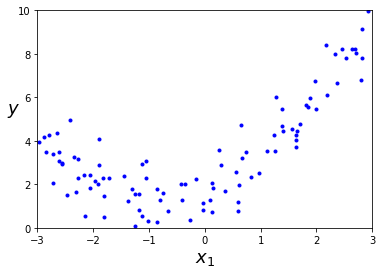

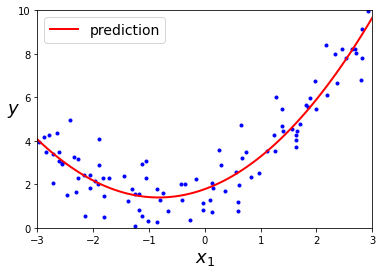

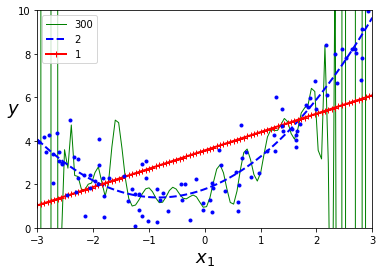

In [ ]:
# 관련 라이브러리
import numpy as np
import numpy.random as rnd
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# (1) X[0] 출력 확인
# (2) X_poly[0] 출력 확인
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# (3) lin_reg.intercept_, lin_reg.coef_ 출력 확인
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()
# (4) 화면 출력 확인
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
 polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
 std_scaler = StandardScaler()
 lin_reg = LinearRegression()
 polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
  ])
 polynomial_regression.fit(X, y)
 y_newbig = polynomial_regression.predict(X_new)
 plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
# (5) 화면 출력 확인

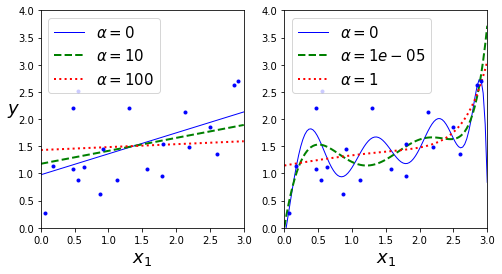

In [ ]:
# 관련 라이브러리
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
def plot_model(model_class, polynomial, alphas, **model_kargs):
 for alpha, style in zip(alphas, ("b-", "g--", "r:")):
  model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
  if polynomial:
    model = Pipeline([
      ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
      ("std_scaler", StandardScaler()),
      ("regul_reg", model),
    ])
  model.fit(X, y)
  y_new_regul = model.predict(X_new)
  lw = 2 if alpha > 0 else 1
  plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
 plt.plot(X, y, "b.", linewidth=3)
 plt.legend(loc="upper left", fontsize=15)
 plt.xlabel("$x_1$", fontsize=18)
 plt.axis([0, 3, 0, 4])
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()
# 화면 출력 확인 및 결과 해석

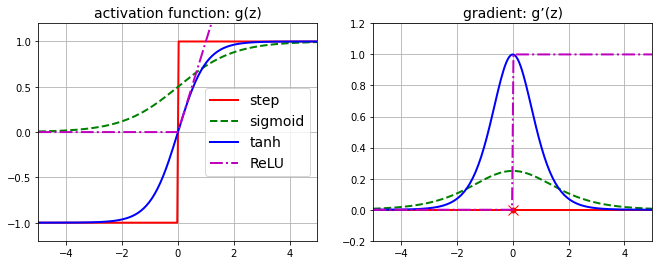

In [ ]:
# 파이썬 2, 파이썬 3 지원
from __future__ import division, print_function, unicode_literals
# 관련 라이브러리
import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
def logit(z):
 return 1 / (1 + np.exp(-z))
def relu(z):
 return np.maximum(0, z)
def derivative(f, z, eps=0.000001):
 return (f(z + eps) - f(z - eps))/(2 * eps)
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("activation function: g(z)", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step ")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("gradient: g’(z)", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()
# 화면 출력 확인 및 각 활성함수의 특징을 비교 서술

In [5]:
import numpy as np
np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)
# (1) 해당 연산망의 그래프 연산을 손으로 작성

grad_c = 1.0
grad_b = grad_c * np.ones ((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a*y
grad_y = grad_a*x
# (2) 위의 연산을 통한 grad_c, grad_b, grad_a, grad_z, grad_x, grad_y 출력 확인

import torch

a = x * y
b = a + z
c = torch.sum(b)

c.backward()
# (3) 역전파 함수 backward()를 이용한 x의 미분, y의 미분 출력 확인

# (4) (2)와 (3)의 방법의 차이를 설명


TypeError: ignored